<a href="https://colab.research.google.com/github/ArnyWu/-Preview-AI-/blob/main/%E6%B3%A2%E5%A3%AB%E9%A0%93%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

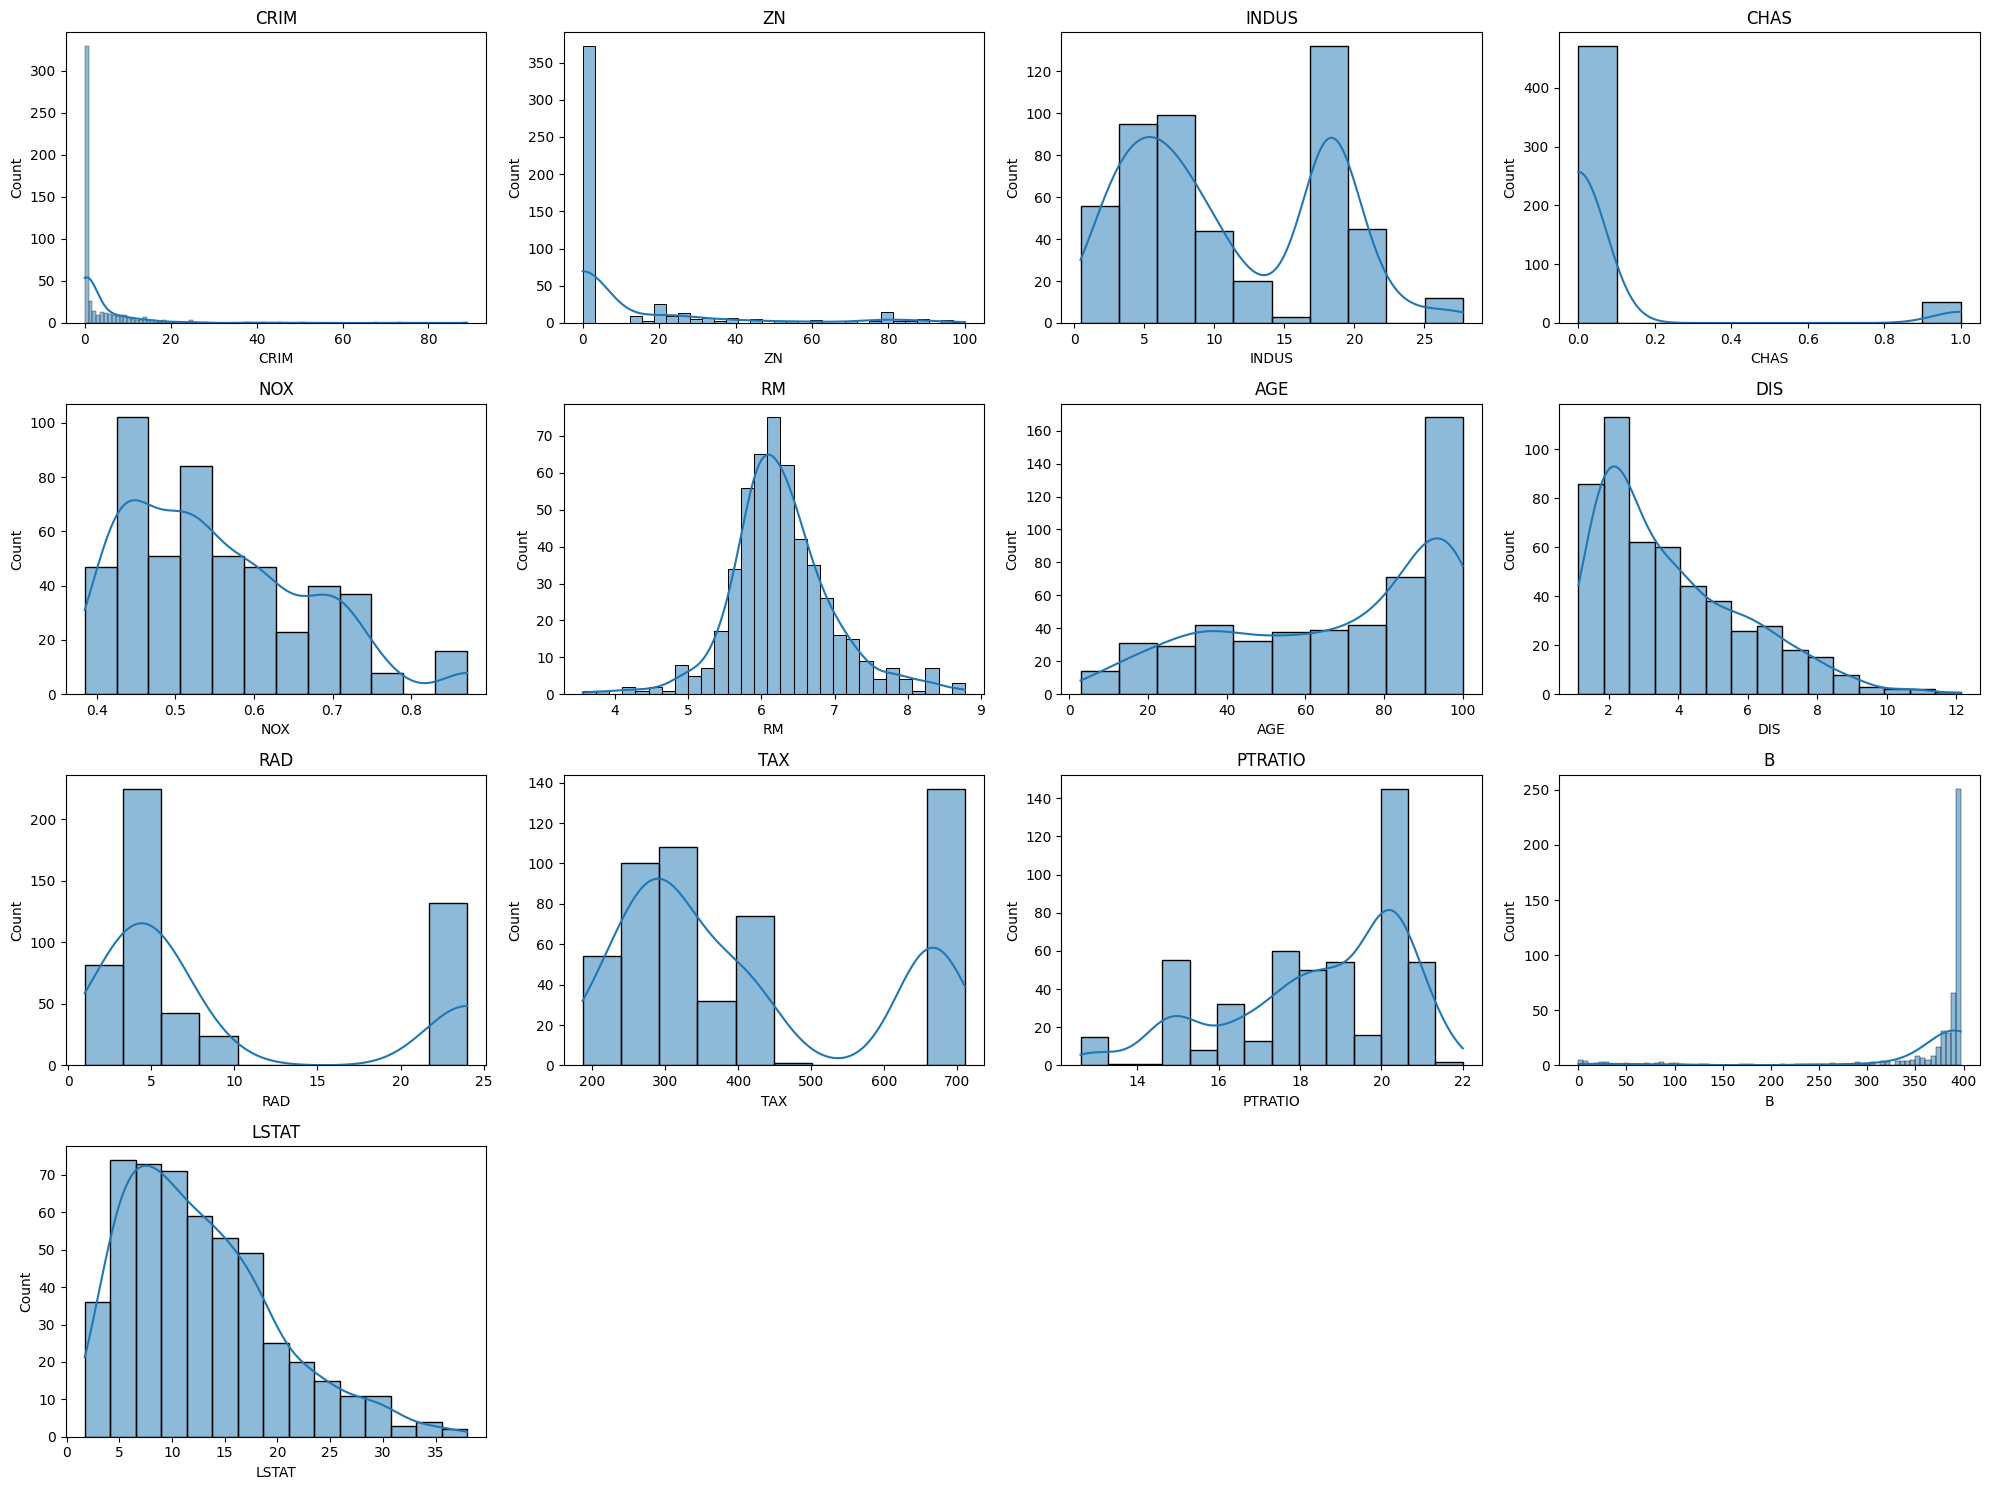

Linear Regression MSE: 24.291119474973478
Ridge Regression MSE: 24.477191227708644
Lasso Regression MSE: 25.155593753934173


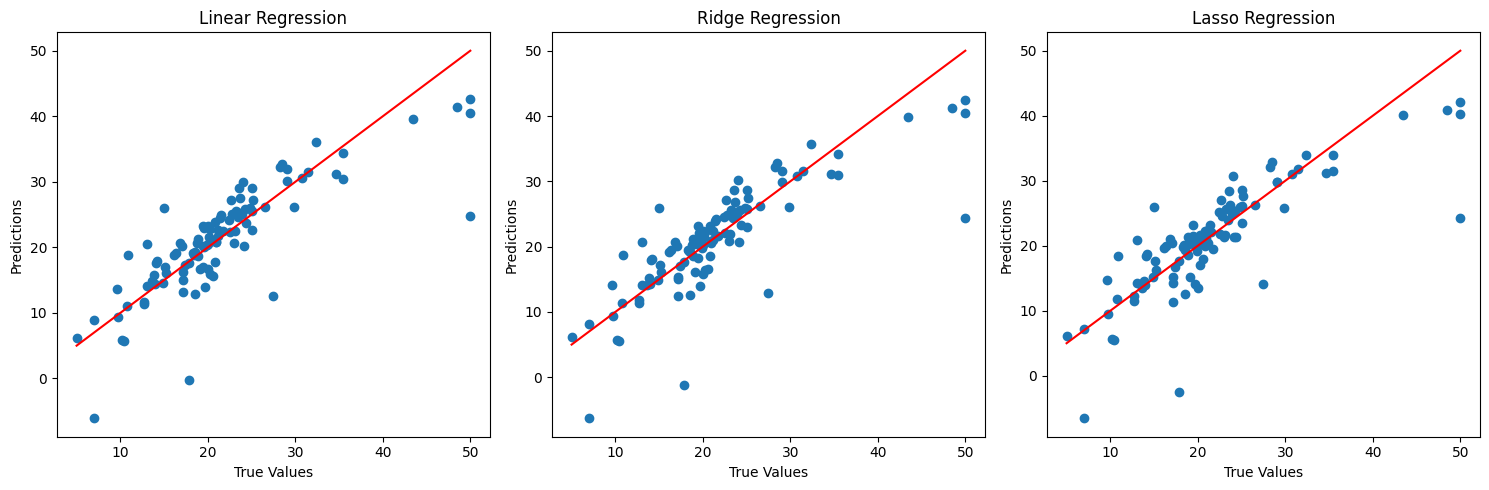

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 載入波士頓房價數據集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 處理數據
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 將數據轉換為 DataFrame 形式
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# 將直行名稱設定為feature_names欄位，方便觀察
X = pd.DataFrame(data, columns=feature_names)

# 在pd新增目標(target)欄位，也就是訓練以及驗證模型時的"參考答案"
y = pd.Series(target)

# 數據描述
print(X.describe())
print(y.describe())

# 數據分佈圖
plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 分割數據為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 線性回歸
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")

# Ridge 正規化
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")

# Lasso 正規化
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")

# 預測結果與真實值比較圖
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

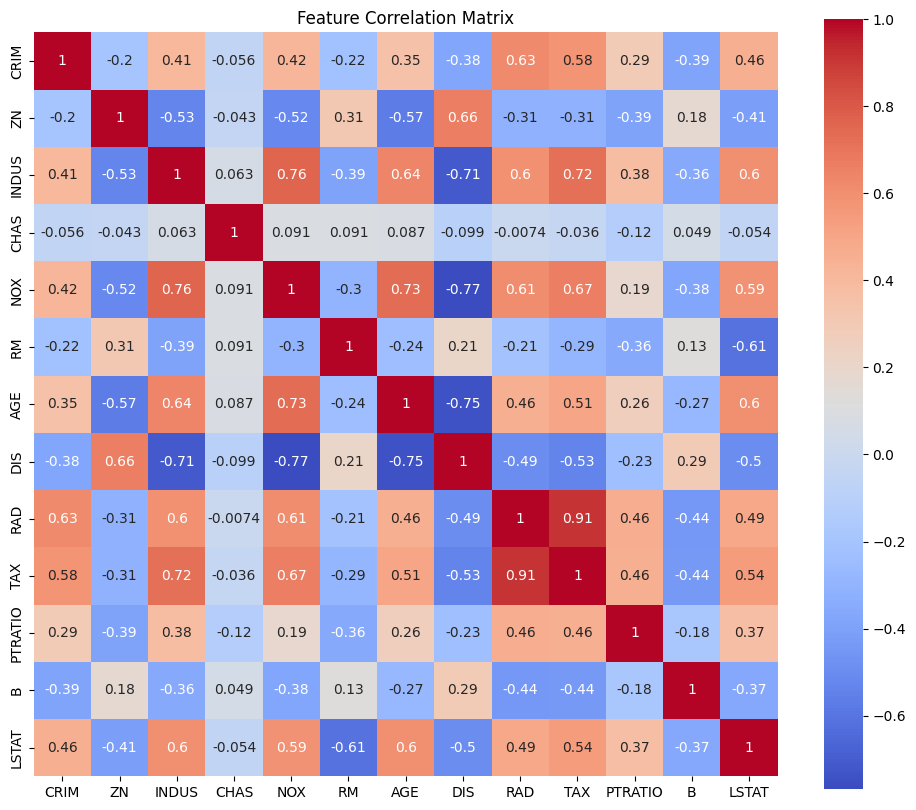

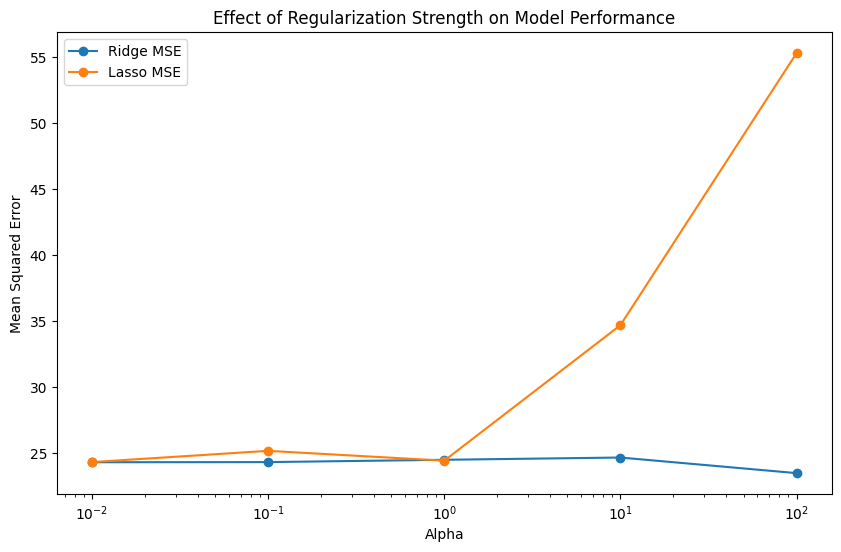

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 載入波士頓房價數據集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 處理數據
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 將數據轉換為 DataFrame 形式
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
X = pd.DataFrame(data, columns=feature_names)
y = pd.Series(target)

# 數據描述
print(X.describe())
print(y.describe())

# 特徵相關性矩陣
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

# 調整正則化強度
alphas = [0.01, 0.1, 1, 10, 100]

ridge_mses = []
lasso_mses = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    ridge_mses.append(mse_ridge)

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    lasso_mses.append(mse_lasso)

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mses, marker='o', label='Ridge MSE')
plt.plot(alphas, lasso_mses, marker='o', label='Lasso MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization Strength on Model Performance')
plt.legend()
plt.show()
